# Play ground to play and visualize the data

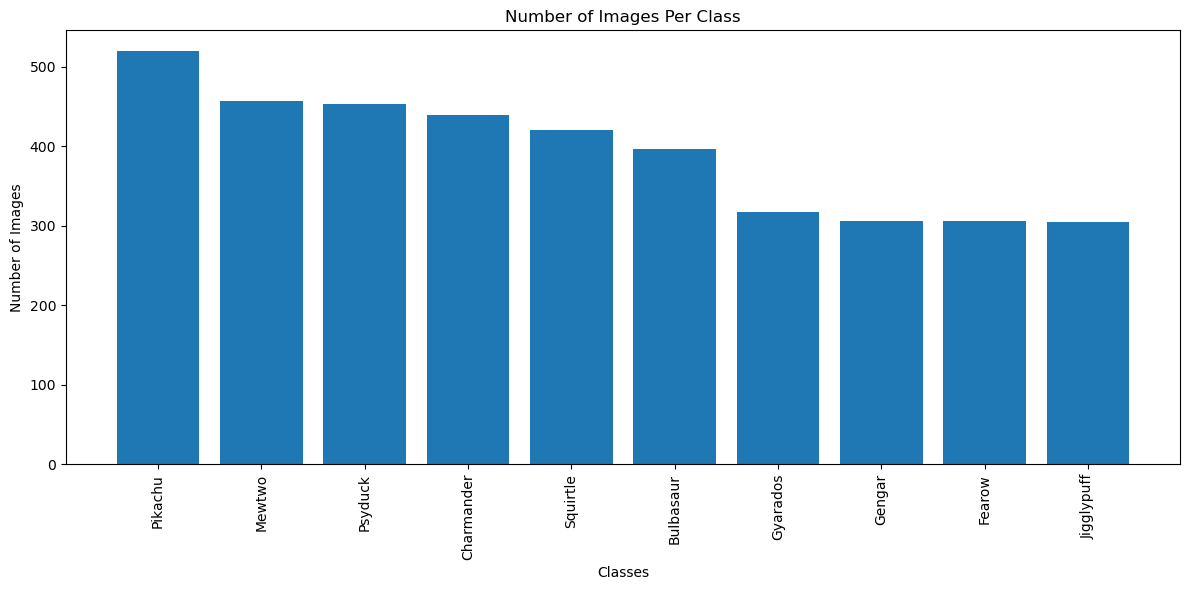

In [1]:
# Load data set as pandsa dataframe
import os
import matplotlib.pyplot as plt

# Path to the main directory containing subdirectories
main_dir = "../data/processed"

# Dictionary to store the count of images per class
class_counts = {}

# Traverse through subdirectories
for subdir in os.listdir(main_dir):
    subdir_path = os.path.join(main_dir, subdir)
    if os.path.isdir(subdir_path):  # Check if it's a directory
        # Count number of image files in the subdirectory
        image_count = sum(
            1 for file in os.listdir(subdir_path) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))
        )
        class_counts[subdir] = image_count


# Sort the dictionary by image count in descending order and take the top 10
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_classes = {k: v for k, v in sorted_classes}

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_classes.keys(), top_classes.values())
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images Per Class")
plt.tight_layout()
plt.show()


Total Classes: 151
Total Images: 34149
Mean Images Per Class: 226.15
Median Images Per Class: 219.0
Standard Deviation: 62.35
Classes with Zero Images: 0
       Image Count
count   151.000000
mean    226.152318
std      62.558532
min      66.000000
25%     192.500000
50%     219.000000
75%     248.500000
max     520.000000
Top 10 Classes:
1. Pikachu: 520 images
2. Mewtwo: 457 images
3. Psyduck: 453 images
4. Charmander: 439 images
5. Squirtle: 420 images
6. Bulbasaur: 396 images
7. Gyarados: 317 images
8. Gengar: 306 images
9. Fearow: 306 images
10. Jigglypuff: 305 images


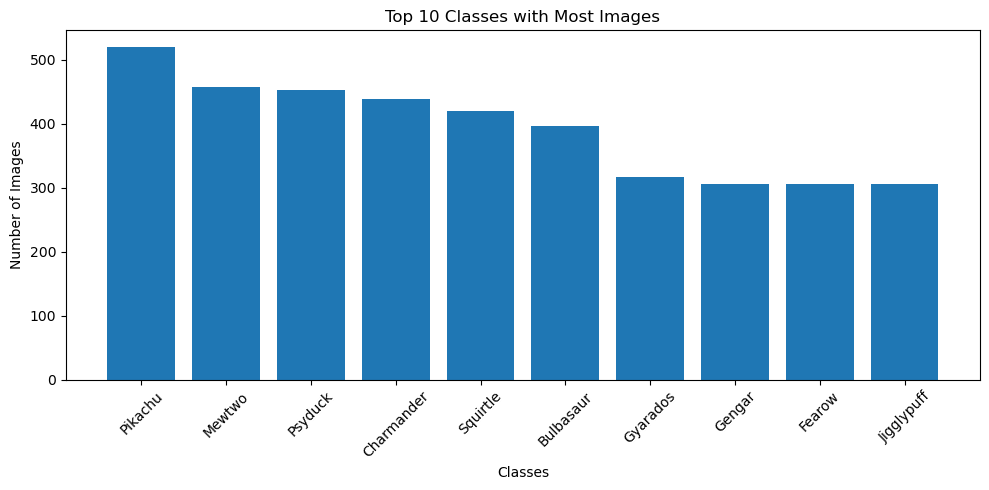

Lowest 10 Classes:
1. Nidoran-f: 66 images
2. Nidoran-m: 84 images
3. Persian: 130 images
4. Onix: 132 images
5. Nidorina: 132 images
6. Kabuto: 135 images
7. Paras: 143 images
8. Abra: 146 images
9. Nidorino: 155 images
10. Krabby: 156 images


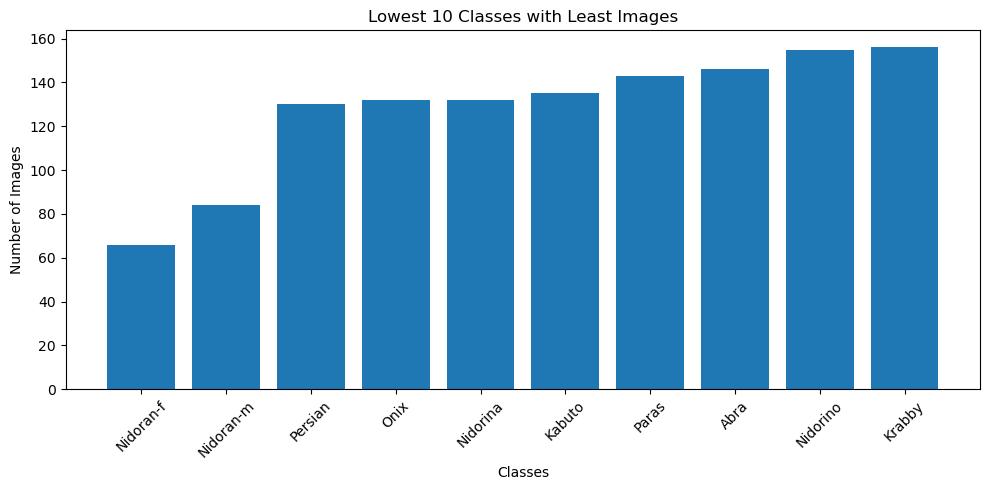

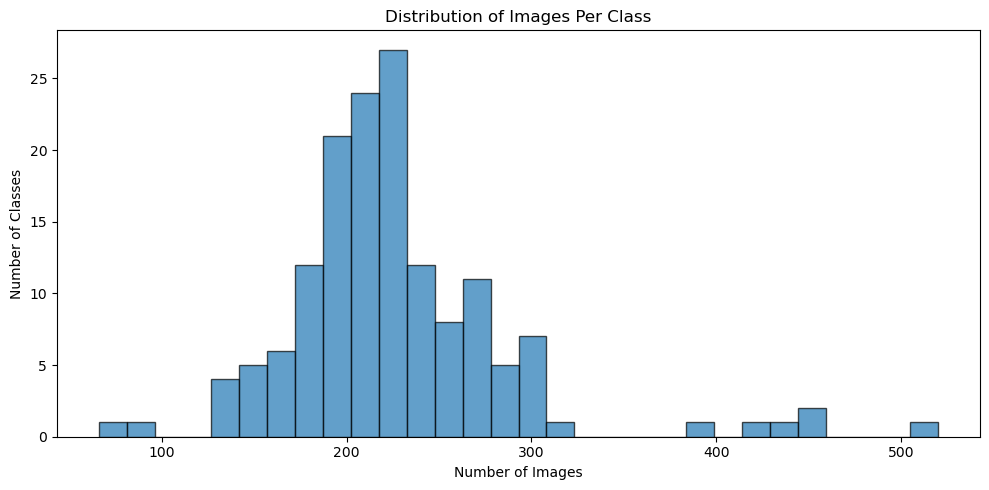

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Path to the main directory containing subdirectories
main_dir = "../data/processed"

# Dictionary to store the count of images per class
class_counts = {}

# Traverse through subdirectories
for subdir in os.listdir(main_dir):
    subdir_path = os.path.join(main_dir, subdir)
    if os.path.isdir(subdir_path):  # Check if it's a directory
        # Count number of image files in the subdirectory
        image_count = sum(
            1 for file in os.listdir(subdir_path) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))
        )
        class_counts[subdir] = image_count

# Compute statistics
total_classes = len(class_counts)
total_images = sum(class_counts.values())
mean_images = np.mean(list(class_counts.values()))
median_images = np.median(list(class_counts.values()))
std_dev_images = np.std(list(class_counts.values()))
zero_image_classes = sum(1 for count in class_counts.values() if count == 0)

# Get top 10 classes
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_classes = {k: v for k, v in sorted_classes}

#Get top lowest 10 classes
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=False)[:10]
lowest_classes = {k: v for k, v in sorted_classes}


# Print statistics
print(f"Total Classes: {total_classes}")
print(f"Total Images: {total_images}")
print(f"Mean Images Per Class: {mean_images:.2f}")
print(f"Median Images Per Class: {median_images}")
print(f"Standard Deviation: {std_dev_images:.2f}")
print(f"Classes with Zero Images: {zero_image_classes}")

# create table with basic statistics
import pandas as pd

# Create a DataFrame from the class_counts dictionary
df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])

# Display basic statistics
print(df.describe())


#Print the top 10 classes
print("Top 10 Classes:")
for i, (class_name, image_count) in enumerate(top_classes.items(), 1):
    print(f"{i}. {class_name}: {image_count} images")
# Create bar chart for top 10 classes
plt.figure(figsize=(10, 5))
plt.bar(top_classes.keys(), top_classes.values())
plt.xticks(rotation=45)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Top 10 Classes with Most Images")
plt.tight_layout()
plt.show()

#Print the lowest 10 classes
print("Lowest 10 Classes:")
for i, (class_name, image_count) in enumerate(lowest_classes.items(), 1):
    print(f"{i}. {class_name}: {image_count} images")
# Create bar chart for top lowest 10 classes
plt.figure(figsize=(10, 5))
plt.bar(lowest_classes.keys(), lowest_classes.values())
plt.xticks(rotation=45)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Lowest 10 Classes with Least Images")
plt.tight_layout()
plt.show()



# Plot the distribution of image counts
plt.figure(figsize=(10, 5))
plt.hist(class_counts.values(), bins=30, alpha=0.7, edgecolor='black')
plt.xlabel("Number of Images")
plt.ylabel("Number of Classes")
plt.title("Distribution of Images Per Class")
plt.tight_layout()
plt.show()



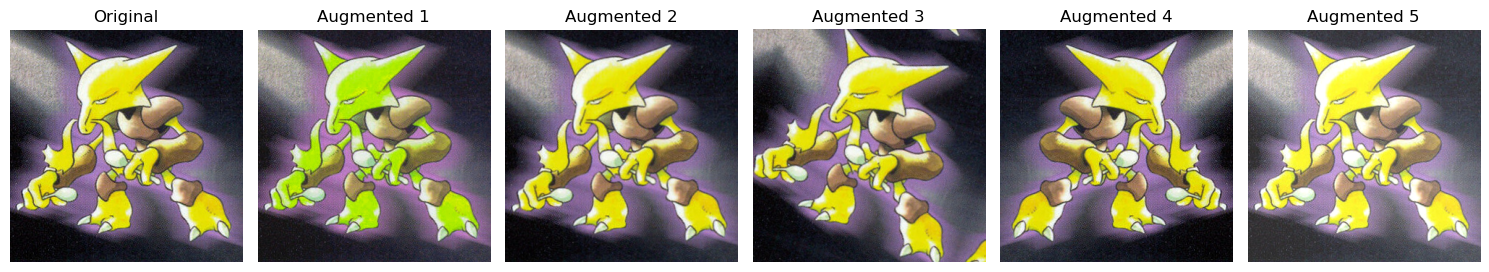

In [22]:
# Example augmented image
import matplotlib.pyplot as plt
from PIL import Image
import sys
import os

# Add the path to the sys.path
sys.path.append(os.path.abspath("../"))

from src.augmentation.augmentor import DataAugmentor

# Load a sample image
image_path = "../data/processed/Alakazam/Alakazam21.jpg"
image = Image.open(image_path).convert("RGB")

# Apply augmentations
augmentor = DataAugmentor(img_size=(224, 224))
augmented_images = [augmentor.augment(image) for _ in range(5)]

# Plot original and augmented images
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

for i, aug_img in enumerate(augmented_images):
    axes[i + 1].imshow(aug_img)
    axes[i + 1].set_title(f"Augmented {i+1}")
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()
